# Application example - Predicting fish weights 
## Fish market dataset
This application example uses the Fish market dataser from Kaggle https://www.kaggle.com/datasets/aungpyaeap/fish-market. The idea of this notebook is to show the performance of the algorithm comparing it to the traditional linear regression method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression
from stepwise_regression import StepwiseRegression

### Organizing the data
The necessary data will be taken and splitted into a matrix A and a vector y.

In [2]:
data = pd.read_csv('Fish.csv')

First, the Species column is remove because this is a categorical data as well as the Weight column, which is what is desired to predict.

In [4]:
A = data.drop(['Species','Weight'], axis=1)
A.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [5]:
y = data.Weight
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

### Traditional linear regression
In the following cells, the traditional linear regression matrix will be computed.

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(A,y)

In [8]:
lr.coeff

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [9]:
lr.bias

-499.5869553564172

This is a general report of the output of the linear regresion and the performance of the model.

In [10]:
lr.anova_report

,Regressor,Coeff,Standard Error,t-statistic,p-value,R^2,R_2 adjusted
0,b_0,-499.5870,29.5722,16.8938,0.0000,0.0000,0.0000
1,Length1,62.3552,40.2087,1.5508,0.1230,0.8853,0.8815
2,Length2,-6.5268,41.7588,0.1563,0.8760,0.8853,0.8815
3,Length3,-29.0262,17.3530,1.6727,0.0964,0.8853,0.8815
4,Height,28.2974,8.7292,3.2417,0.0015,0.8853,0.8815
5,Width,22.4733,20.3717,1.1032,0.2717,0.8853,0.8815


This plot shows the correlation between the actual y and the predited by the linear regression compared with a y=x line.

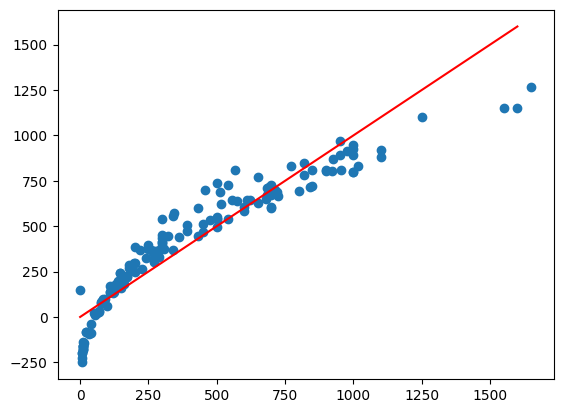

In [11]:
plt.scatter(y,lr.predict(A))
plt.plot([0,1600],[0,1600], color='red')

## The stepwise linear regression
The traditional linear regression reached an $R^2$ coefficient of 0.88, now, the following scatter matrix shows that some of the features in the data set are hightly correlated, so some of those could be ommited in order to have a simpler model. This is the goal of this procedure, discart those features that are not much relevant.

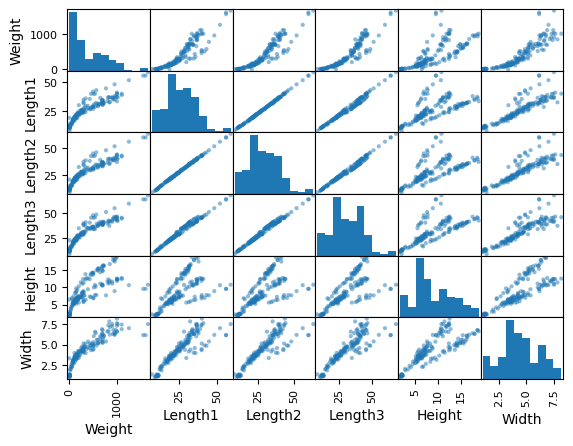

In [19]:
pd.plotting.scatter_matrix(data);

In [12]:
stwr = StepwiseRegression()

In [13]:
stwr.fit(A,y)

Now, from 5 features only 2 ended up being statiscally significant, and as can be seen, the cost of having a simpler model is just some points in the $R^2$ value. The next table should be be read as follows:
<ul>
    <li> In a first interation, Lenght3 was the most significant features. A model having it as the only regressonr gave an $R^2$ of 0.8511.</li>
    <li> In a second iteration, the most significant of the remaining features was Width. A model that has Length3 and Width as regressors reach a $R^2$ of 0.8755.</li> 
    <li>In a third iteration, none of the remaing features was considered statistically significant, so the method return a model with two features.</li>
</ul>

In [14]:
stwr.anova_report

,Regressor,Coeff,Standard Error,t-statistic,p-value,R^2,R_2 adjusted
0,Length3,28.4602,0.9466,30.0646,0.0,0.8520,0.8511
1,Width,70.3426,12.4793,5.6367,0.0,0.8771,0.8755


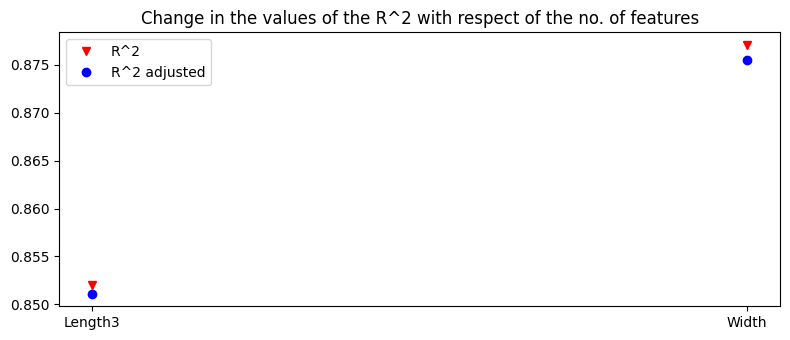

In [33]:
plt.rcParams["figure.figsize"] = [8, 3.5]
plt.rcParams["figure.autolayout"] = True
plt.plot(stwr.regressors, stwr.anova_report["R^2"],"rv", label="hola")
plt.plot(stwr.regressors, stwr.anova_report["R_2 adjusted"], "bo", label="Chau")
plt.legend(["R^2", "R^2 adjusted"])
plt.title('Change in the values of the R^2 with respect of the no. of features')
plt.show()

In [15]:
stwr.coeff

array([19.48721323, 70.34257328])

In [16]:
stwr.bias

-520.9389503879568

In [17]:
stwr.regressors

['Length3', 'Width']

This plot shows the correlation between the actual y and the predited by the stepwise linear regression compared with a y=x line. As can be seen, the results are almost the same as the traditional method.

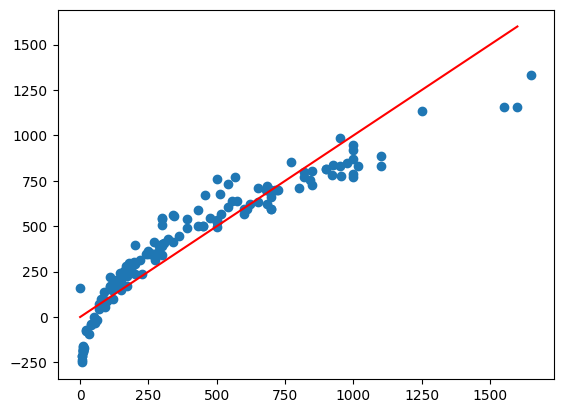

In [22]:
plt.scatter(y,stwr.predict(A[stwr.regressors]))
plt.plot([0,1600],[0,1600], color='red')